# Chapter 3 - Graph platforms and processing




## Considerations Overview


* Graph analytical processing has unique qualities such as computation that is structural driven, global focused and difficult to parse. 



## Platform considerations

* Should we scale up (vertically) or out (horizontally) graph processing. 
* Should you use a powerful multi-core vm and focus on efficient data structures and multithreaded algos? 
* Or should you invest in distributed processing framework and related algos.

#### Useful approach is configurability that outperforms a single thread (COST) 

* COST provides us with a way to compare a systems scalability with the overhead the system introduces. 
* The core concept is a well configured system using an optimized algo and data structures can outperform current       general purpose scale out solutions
* It's a system for measuring performance gain without rewarding systems that lean on distribution to mask problems
* Seperating scalability and efficient use of resources will help us build a platform configured exactly for our needs.
* Some approaches to graph platforms include highly integrated solutions that optimize algos, processing and memory retrieval to work in tighter coordination. 



## Processing considerations 


* There are different approaches for expressing data processing; for example, stream or batch processing or map reduce paradigm for records based data. 
* For graph data, there also exist approaches which incorporate the data dependencies inherenet in graph structures to their processing. 

### Node Centric 

* this approach uses nodes as processing units
* Nodes accumulate compute state and communicate state via messages to their neighbors. This model uses the provided
  transformation functions for more straightforward implementation of algos
  
  
### Relationship Centric

* Approach has similiarities to node-centric model above but may perform better for subgraph or sequential analysis

### Graph-Centric

* These models process nodes within a subgraph independent of other subgraphs while minimum communication to other subgraphs happens via messaging

### Traversal Centric

* These models use the accumulation of data by the traverser while navigating the graph as their means of computation

### Algo Centric

* These approaches use various methods to optimize implementations per algo. This is a hybrid of the previous models. 


### A note...

* Most of these graph-specific approaches require the prescense of the whole graph for efficient cross-topology operations. This is because seperating and distributing the graph data leads to extensive data transfers and reshuffling between worker instances. 
* This is difficult for algos that need to iteratively process the entire graph structure. 


## Graph Compute Engine vs Graph Database


### GCE (Graph Compute Engine)

* Read only, non-transactional engines that focus on efficient execution of iterative graph analytics and queries of the whole graph
* Graph compute engines support different definition and processing paradigms for graph algos, like node-centric (Pregel, Gather-Apply, Scatter). 
* Example enginers are Giraph, GraphLab,Graph-Engine, Spark


### Graph Databases

* From a transactional background, these focus on fast writes and reads using much smaller queries that generally touch a small fraction of the graph. Their strengths are in operational robustness and high concurrent stability for many users



### Spark works when

* Algos are fundamentally parallelizable or partitionable
* Algo workflows need multilingual operations in multi tool and languages
* Analysis can be run offline in batch mode
* Graph analysis is on data not transformed into a graph format
* Team needs and has the experise to code and implement their own algos
* Team uses graph algos infrequently
* Team prefers to keep all data and analysis within Hadoop ecosystem. 


### Neo4j,  tightly integrated database and algo centric processing, works when:

* Algos are more iterative and require good memory locality
* Algos and results are performance sensative
* Graph analysis is on complex graph data and or requires deep traversals
* Analysis/results are integrated with graph-based visualazation tools
* Teams prefers prepackaged and supported algos


### You can use both!

* Spark used for high level filtering and preprocessing of massive datasets and data integration. 
* Neo4j for more specific processing and integration with graph-based applications




## Apache Spark

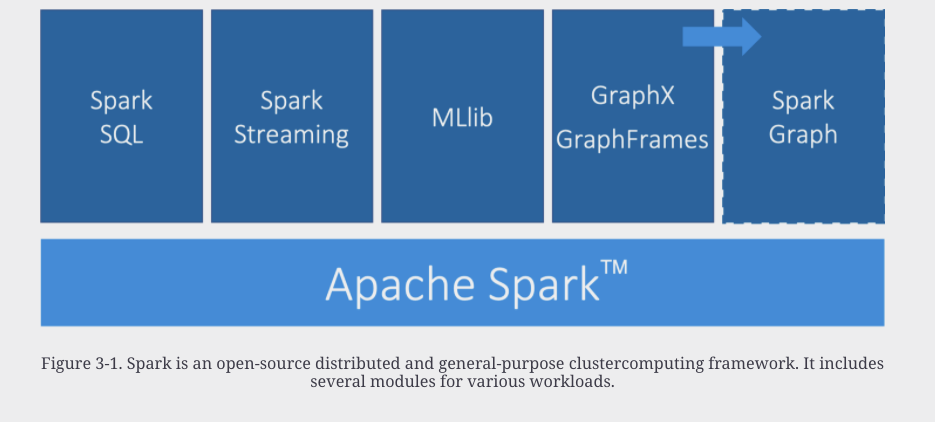


* GraphFrames is a graph processing library for Spark that succeeded GraphX in 2016
* Graphframes is based on Graphx but uses DataFrames as it's underlying data structure
* Graphframes support Java, Scala and python
* Examples in this book will be based on Pyspark


### Dataframe structure of Graph

* Nodes and relationships are serielized into dataframes. 
* Nodes will have unique IDs
* Relationships will have columns for source,destination nodes ID

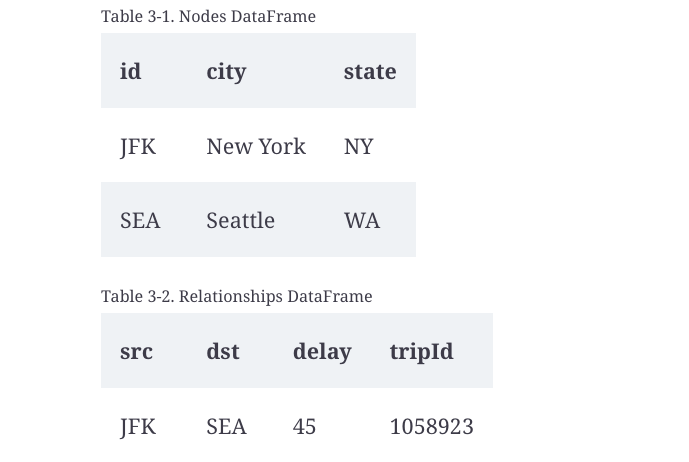

* nodes and relationships can be loaded using any dataframe source: parquet,csv,json
* queries can be used in a variety of forms (either spark API or SparkSQL)
